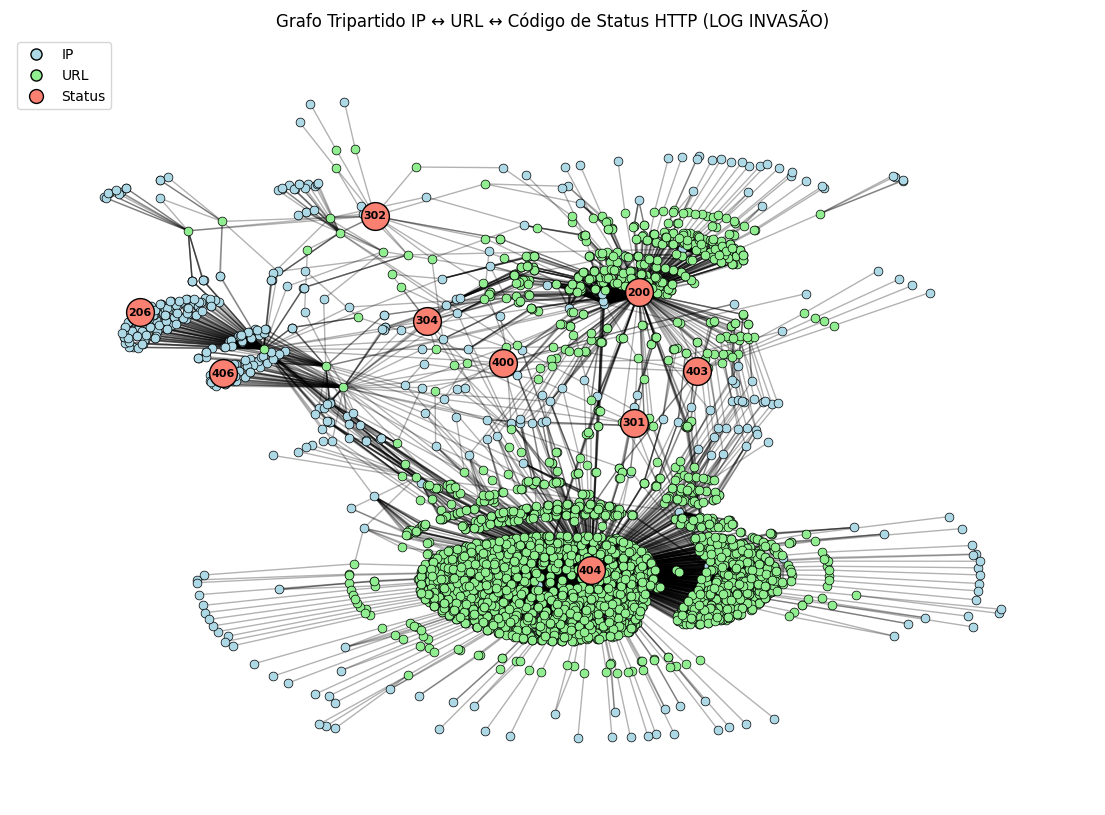

In [1]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Regex para Apache log
log_pattern = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<date>.*?)\] "(?P<method>\w+) (?P<url>\S+) HTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

# Carregar e parsear log
log_file = 'logs-invasao.log'

entries = []
with open(log_file, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            entries.append(match.groupdict())

df = pd.DataFrame(entries)
df['status'] = df['status'].astype(int)

# Criar grafo
G = nx.Graph()

# Adicionar nós e arestas IP → URL e URL → Status
for _, row in df.iterrows():
    ip = row['ip']
    url = row['url']
    status = str(row['status'])

    G.add_node(ip, tipo='ip')
    G.add_node(url, tipo='url')
    G.add_node(status, tipo='status')

    G.add_edge(ip, url)
    G.add_edge(url, status)

# Layout e visualização simplificada
pos = nx.spring_layout(G, seed=42)

# Separar os tipos de nós
ips = [n for n, d in G.nodes(data=True) if d['tipo'] == 'ip']
urls = [n for n, d in G.nodes(data=True) if d['tipo'] == 'url']
status_codes = [n for n, d in G.nodes(data=True) if d['tipo'] == 'status']

plt.figure(figsize=(14, 10))

# Nós IP com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=ips,
    node_color='lightblue',
    edgecolors='black',  # borda preta
    linewidths=0.5,      # espessura da borda
    label='IP',
    node_size=40
)

# Nós URL com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=urls,
    node_color='lightgreen',
    edgecolors='black',
    linewidths=0.5,
    label='URL',
    node_size=40
)

# Nós Status com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=status_codes,
    node_color='salmon',
    edgecolors='black',
    linewidths=1.0,
    label='Status',
    node_size=400
)

nx.draw_networkx_edges(G, pos, alpha=0.3)

nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in status_codes},
    font_size=8,
    font_weight='bold'
)


plt.title("Grafo Tripartido IP ↔ URL ↔ Código de Status HTTP (LOG INVASÃO)")
plt.axis('off')
# Handles com círculos proporcionais
ip_handle = Line2D([0], [0], marker='o', color='w', label='IP', markerfacecolor='lightblue', markeredgecolor='black', markersize=8)
url_handle = Line2D([0], [0], marker='o', color='w', label='URL', markerfacecolor='lightgreen', markeredgecolor='black', markersize=8)
status_handle = Line2D([0], [0], marker='o', color='w', label='Status', markerfacecolor='salmon', markeredgecolor='black', markersize=10)

plt.legend(handles=[ip_handle, url_handle, status_handle], loc='upper left')

plt.savefig("grafo-ip-url-status-invasao.png", dpi=300, bbox_inches='tight', format='png')
plt.show()

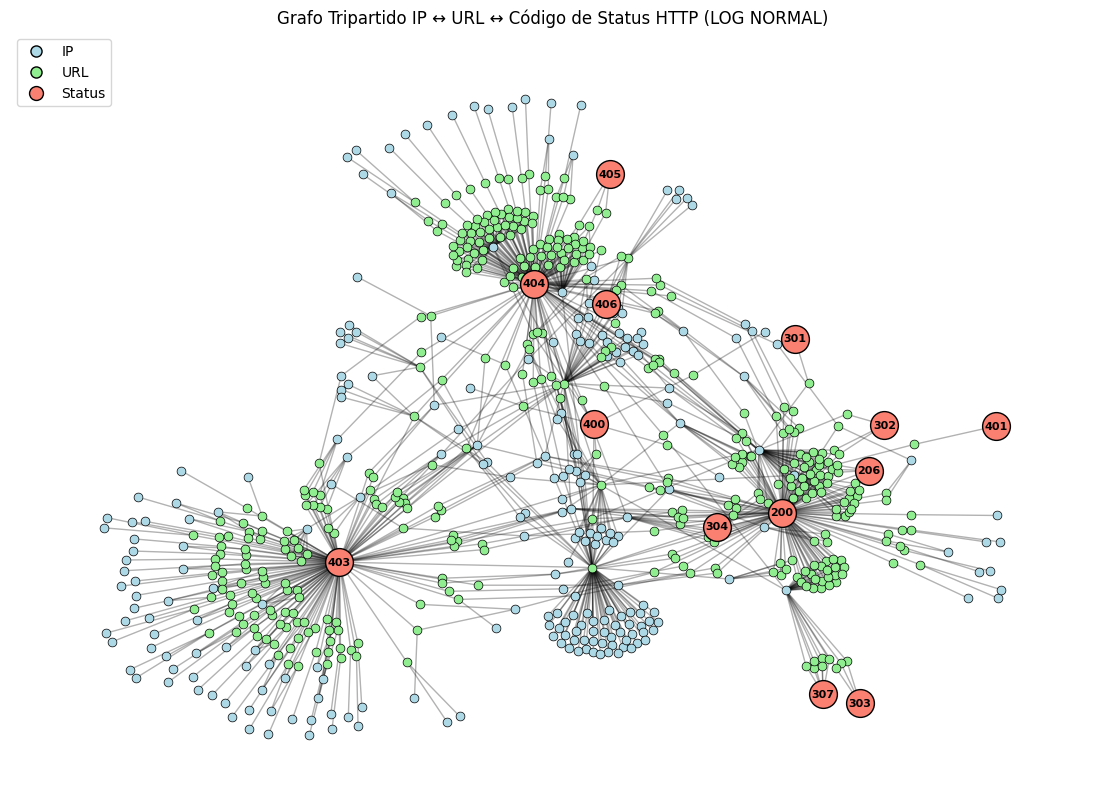

In [2]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Regex para Apache log
log_pattern = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<date>.*?)\] "(?P<method>\w+) (?P<url>\S+) HTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

# Carregar e parsear log
log_file = 'log3-junho-a3'

entries = []
with open(log_file, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            entries.append(match.groupdict())

df = pd.DataFrame(entries)
df['status'] = df['status'].astype(int)

# Criar grafo
G = nx.Graph()

# Adicionar nós e arestas IP → URL e URL → Status
for _, row in df.iterrows():
    ip = row['ip']
    url = row['url']
    status = str(row['status'])

    G.add_node(ip, tipo='ip')
    G.add_node(url, tipo='url')
    G.add_node(status, tipo='status')

    G.add_edge(ip, url)
    G.add_edge(url, status)

# Layout e visualização simplificada
pos = nx.spring_layout(G, seed=42)

# Separar os tipos de nós
ips = [n for n, d in G.nodes(data=True) if d['tipo'] == 'ip']
urls = [n for n, d in G.nodes(data=True) if d['tipo'] == 'url']
status_codes = [n for n, d in G.nodes(data=True) if d['tipo'] == 'status']

plt.figure(figsize=(14, 10))

# Nós IP com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=ips,
    node_color='lightblue',
    edgecolors='black',  # borda preta
    linewidths=0.5,      # espessura da borda
    label='IP',
    node_size=40
)

# Nós URL com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=urls,
    node_color='lightgreen',
    edgecolors='black',
    linewidths=0.5,
    label='URL',
    node_size=40
)

# Nós Status com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=status_codes,
    node_color='salmon',
    edgecolors='black',
    linewidths=1.0,
    label='Status',
    node_size=400
)

nx.draw_networkx_edges(G, pos, alpha=0.3)

nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in status_codes},
    font_size=8,
    font_weight='bold'
)


plt.title("Grafo Tripartido IP ↔ URL ↔ Código de Status HTTP (LOG NORMAL)")
plt.axis('off')
# Handles com círculos proporcionais
ip_handle = Line2D([0], [0], marker='o', color='w', label='IP', markerfacecolor='lightblue', markeredgecolor='black', markersize=8)
url_handle = Line2D([0], [0], marker='o', color='w', label='URL', markerfacecolor='lightgreen', markeredgecolor='black', markersize=8)
status_handle = Line2D([0], [0], marker='o', color='w', label='Status', markerfacecolor='salmon', markeredgecolor='black', markersize=10)

plt.legend(handles=[ip_handle, url_handle, status_handle], loc='upper left')

#plt.savefig("grafo-ip-url-status-normal.png", dpi=300, bbox_inches='tight', format='png')
plt.show()

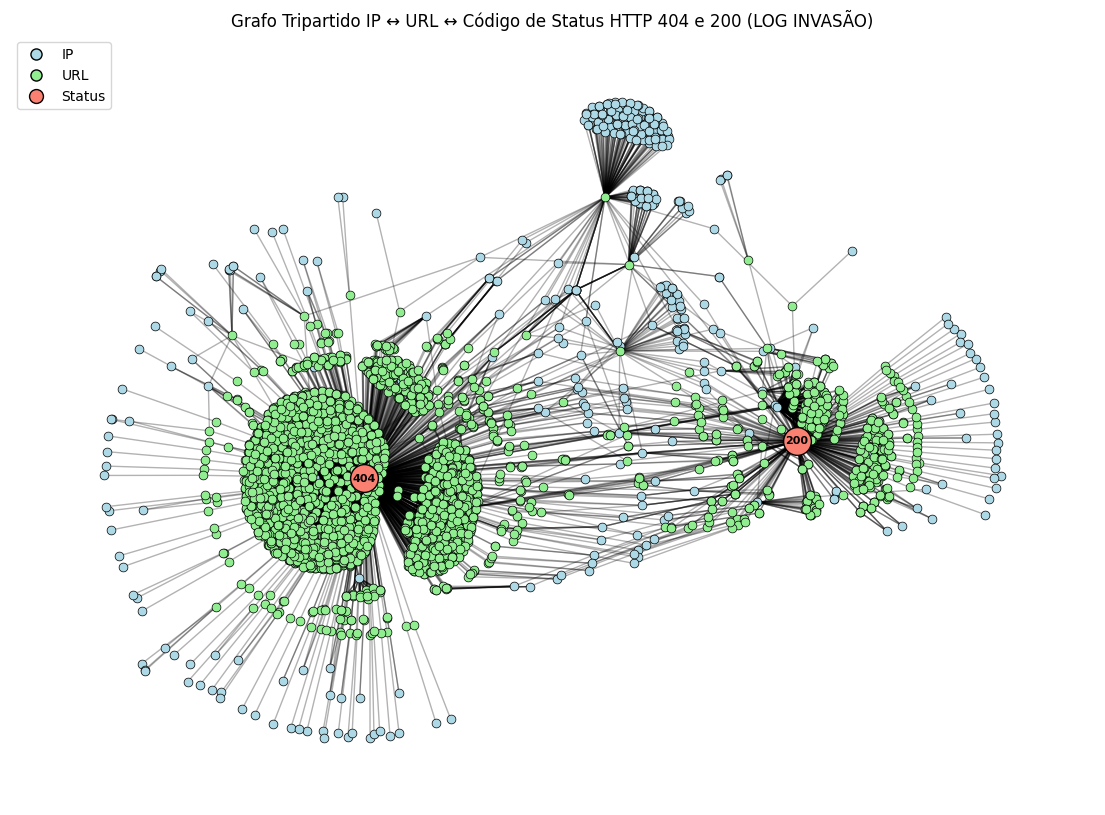

In [3]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Regex para Apache log
log_pattern = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<date>.*?)\] "(?P<method>\w+) (?P<url>\S+) HTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

# Carregar e parsear log
log_file = 'logs-invasao.log'
entries = []
with open(log_file, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            entries.append(match.groupdict())

df = pd.DataFrame(entries)
df['status'] = df['status'].astype(int)
df = df[df['status'].isin([200, 404])]  # filtrar 200 e 404

# Criar grafo
G = nx.Graph()

# Adicionar nós e arestas IP → URL e URL → Status
for _, row in df.iterrows():
    ip = row['ip']
    url = row['url']
    status = str(row['status'])

    G.add_node(ip, tipo='ip')
    G.add_node(url, tipo='url')
    G.add_node(status, tipo='status')

    G.add_edge(ip, url)
    G.add_edge(url, status)

# Layout e visualização simplificada
pos = nx.spring_layout(G, seed=42)


# Separar os tipos de nós
ips = [n for n, d in G.nodes(data=True) if d['tipo'] == 'ip']
urls = [n for n, d in G.nodes(data=True) if d['tipo'] == 'url']
status_codes = [n for n, d in G.nodes(data=True) if d['tipo'] == 'status']

plt.figure(figsize=(14, 10))

# Nós IP com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=ips,
    node_color='lightblue',
    edgecolors='black',  # borda preta
    linewidths=0.5,      # espessura da borda
    label='IP',
    node_size=40
)

# Nós URL com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=urls,
    node_color='lightgreen',
    edgecolors='black',
    linewidths=0.5,
    label='URL',
    node_size=40
)

# Nós Status com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=status_codes,
    node_color='salmon',
    edgecolors='black',
    linewidths=1.0,
    label='Status',
    node_size=400
)

nx.draw_networkx_edges(G, pos, alpha=0.3)

nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in status_codes},
    font_size=8,
    font_weight='bold'
)


plt.title("Grafo Tripartido IP ↔ URL ↔ Código de Status HTTP 404 e 200 (LOG INVASÃO)")
plt.axis('off')
# Handles com círculos proporcionais
ip_handle = Line2D([0], [0], marker='o', color='w', label='IP', markerfacecolor='lightblue', markeredgecolor='black', markersize=8)
url_handle = Line2D([0], [0], marker='o', color='w', label='URL', markerfacecolor='lightgreen', markeredgecolor='black', markersize=8)
status_handle = Line2D([0], [0], marker='o', color='w', label='Status', markerfacecolor='salmon', markeredgecolor='black', markersize=10)

plt.legend(handles=[ip_handle, url_handle, status_handle], loc='upper left')

plt.savefig("grafo-ip-url-status-404-200-invasao.png", dpi=300, bbox_inches='tight', format='png')
plt.show()

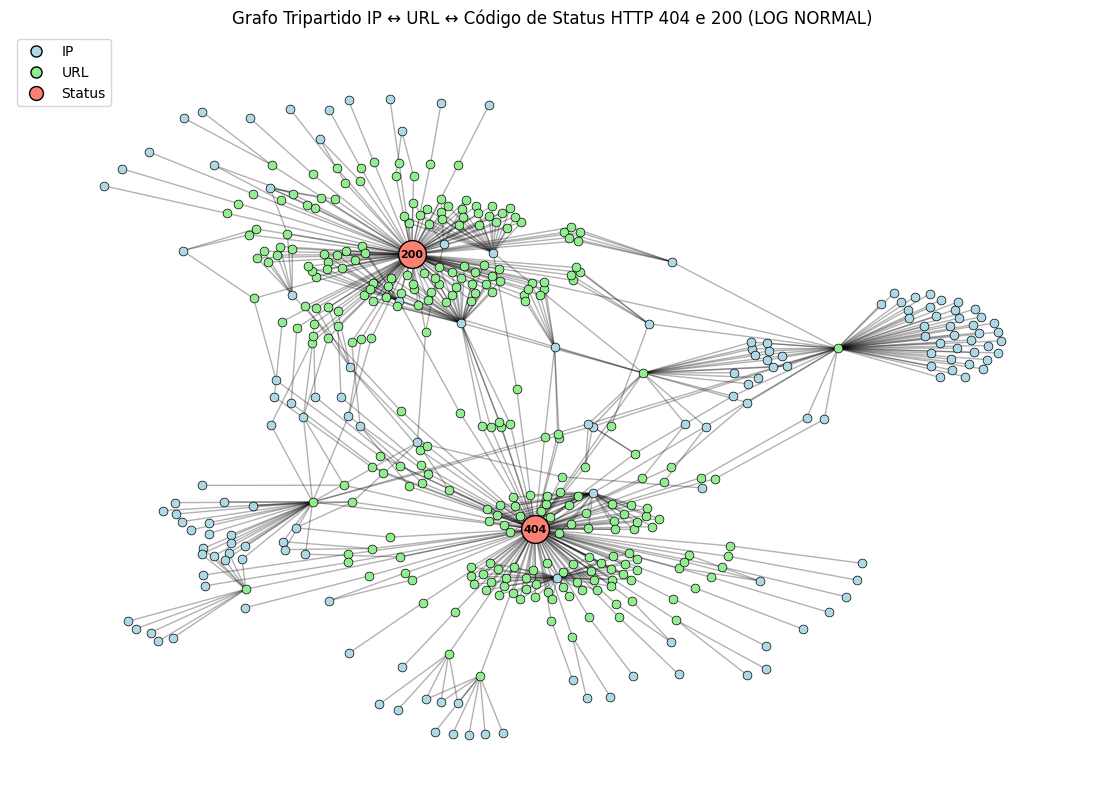

In [4]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Regex para Apache log
log_pattern = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<date>.*?)\] "(?P<method>\w+) (?P<url>\S+) HTTP/\d\.\d" (?P<status>\d{3}) (?P<size>\d+|-) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

# Carregar e parsear log
log_file = 'log3-junho-a3'
entries = []
with open(log_file, 'r', encoding='utf-8', errors='ignore') as file:
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            entries.append(match.groupdict())

df = pd.DataFrame(entries)
df['status'] = df['status'].astype(int)
df = df[df['status'].isin([200, 404])]  # filtrar 200 e 404

# Criar grafo
G = nx.Graph()

# Adicionar nós e arestas IP → URL e URL → Status
for _, row in df.iterrows():
    ip = row['ip']
    url = row['url']
    status = str(row['status'])

    G.add_node(ip, tipo='ip')
    G.add_node(url, tipo='url')
    G.add_node(status, tipo='status')

    G.add_edge(ip, url)
    G.add_edge(url, status)

# Layout e visualização simplificada
pos = nx.spring_layout(G, seed=42)


# Separar os tipos de nós
ips = [n for n, d in G.nodes(data=True) if d['tipo'] == 'ip']
urls = [n for n, d in G.nodes(data=True) if d['tipo'] == 'url']
status_codes = [n for n, d in G.nodes(data=True) if d['tipo'] == 'status']

plt.figure(figsize=(14, 10))

# Nós IP com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=ips,
    node_color='lightblue',
    edgecolors='black',  # borda preta
    linewidths=0.5,      # espessura da borda
    label='IP',
    node_size=40
)

# Nós URL com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=urls,
    node_color='lightgreen',
    edgecolors='black',
    linewidths=0.5,
    label='URL',
    node_size=40
)

# Nós Status com borda preta
nx.draw_networkx_nodes(
    G, pos,
    nodelist=status_codes,
    node_color='salmon',
    edgecolors='black',
    linewidths=1.0,
    label='Status',
    node_size=400
)

nx.draw_networkx_edges(G, pos, alpha=0.3)

nx.draw_networkx_labels(
    G, pos,
    labels={n: n for n in status_codes},
    font_size=8,
    font_weight='bold'
)


plt.title("Grafo Tripartido IP ↔ URL ↔ Código de Status HTTP 404 e 200 (LOG NORMAL)")
plt.axis('off')
# Handles com círculos proporcionais
ip_handle = Line2D([0], [0], marker='o', color='w', label='IP', markerfacecolor='lightblue', markeredgecolor='black', markersize=8)
url_handle = Line2D([0], [0], marker='o', color='w', label='URL', markerfacecolor='lightgreen', markeredgecolor='black', markersize=8)
status_handle = Line2D([0], [0], marker='o', color='w', label='Status', markerfacecolor='salmon', markeredgecolor='black', markersize=10)

plt.legend(handles=[ip_handle, url_handle, status_handle], loc='upper left')

#plt.savefig("grafo-ip-url-status-404-200-normal.png", dpi=300, bbox_inches='tight', format='png')
plt.show()